<a href="https://colab.research.google.com/github/shabhash497/MultiModelRAG/blob/main/Multimodal_RAG_Extract_Images_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-1: Install the packages

In [1]:
# Install required packages
!pip install langchain langchain-community pillow pymupdf python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
#!pip install langchain-groq

In [4]:
pip install -U langchain-cohere


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: httpx-sse
    Found existing installation: httpx-sse 0.4.1
    Uninstalling httpx-sse-0.4.1:
      Successfully uninstalled httpx-sse-0.4.1
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.75
    Uninstalling langchain-core-0.3.75:
      Successfully uninstalled langchain-core-0.3.75


# Step-2: Import packages

In [5]:
import fitz  # PyMuPDF
from PIL import Image
import io
import os
from dotenv import load_dotenv

import google.generativeai as genai
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_cohere import ChatCohere, CohereEmbeddings

load_dotenv()

False

# Step-3: Read the attention_is_all_you_need.pdf

In [6]:
!wget https://arxiv.org/pdf/1706.03762
!mv 1706.03762 attention_is_all_you_need.pdf

--2025-09-14 05:14:19--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.195.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762’

1706.03762          100%[===================>]   2.11M  --.-KB/s    in 0.05s   

2025-09-14 05:14:19 (42.1 MB/s) - ‘1706.03762’ saved [2215244/2215244]



In [7]:
pdf_file=fitz.open('attention_is_all_you_need.pdf')

In [8]:
len(pdf_file)

15

In [9]:
page = pdf_file[1]
page

page 1 of attention_is_all_you_need.pdf

In [10]:
 text = page.get_text().strip()
 print(text)

1
Introduction
Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks
in particular, have been firmly established as state of the art approaches in sequence modeling and
transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous
efforts have since continued to push the boundaries of recurrent language models and encoder-decoder
architectures [38, 24, 15].
Recurrent models typically factor computation along the symbol positions of the input and output
sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden
states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently
sequential nature precludes parallelization within training examples, which becomes critical at longer
sequence lengths, as memory constraints limit batching across examples. Recent work has achieved
significant improvements in computational efficiency through factor

**image page**

In [11]:
page = pdf_file[2]
text = page.get_text().strip()
print(text)

Figure 1: The Transformer - model architecture.
The Transformer follows this overall architecture using stacked self-attention and point-wise, fully
connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,
respectively.
3.1
Encoder and Decoder Stacks
Encoder:
The encoder is composed of a stack of N = 6 identical layers. Each layer has two
sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-
wise fully connected feed-forward network. We employ a residual connection [11] around each of
the two sub-layers, followed by layer normalization [1]. That is, the output of each sub-layer is
LayerNorm(x + Sublayer(x)), where Sublayer(x) is the function implemented by the sub-layer
itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding
layers, produce outputs of dimension dmodel = 512.
Decoder:
The decoder is also composed of a stack of N = 6 identical layers. 

In [12]:
images = page.get_images(full=True)
images

[(128, 175, 1520, 2239, 8, 'DeviceRGB', '', 'Im1', 'FlateDecode', 0)]

In [13]:
xref=images[0][0]

In [14]:
# extract the image
base_image = pdf_file.extract_image(xref)
image_bytes = base_image["image"]
#image_bytes

**display the image**

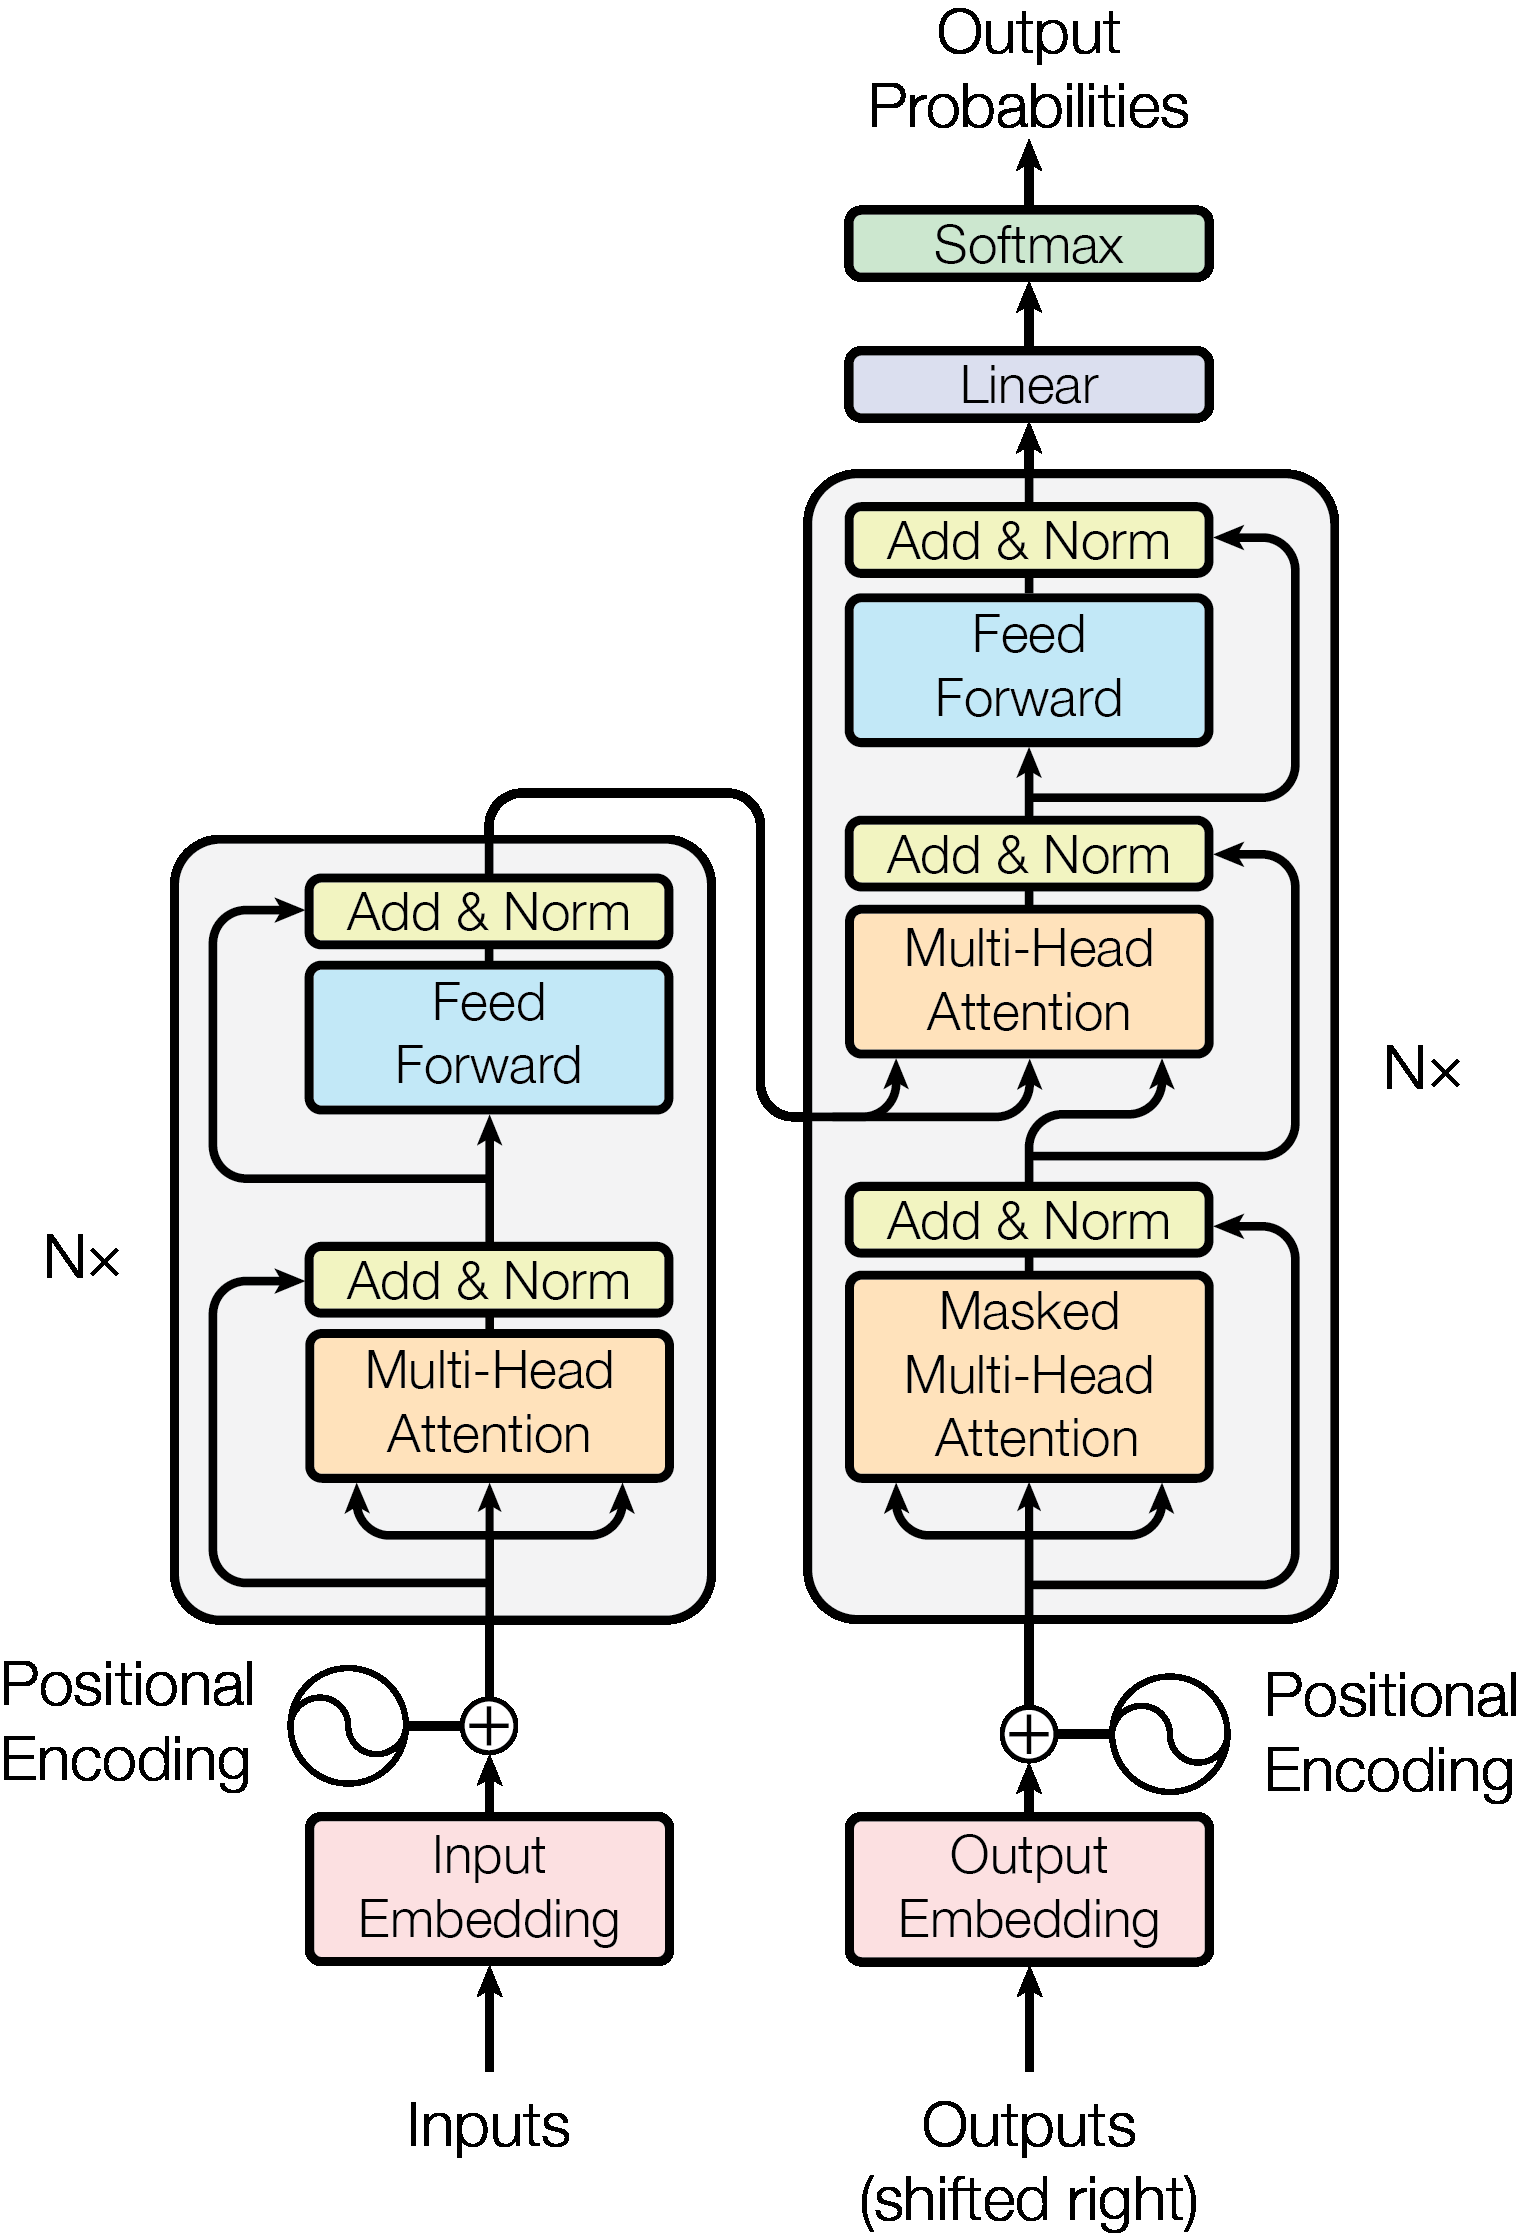

In [15]:
from PIL import Image
import io

# convert bytes to a PIL image
image = Image.open(io.BytesIO(image_bytes))

# show the image (opens with default image viewer or inline in Jupyter)
image


# Extract the Text using Gemini

In [16]:
from google.colab import userdata
api_key=userdata.get('gemini_key')

In [17]:
genai.configure(api_key=api_key)
model = genai.GenerativeModel(model_name="gemini-2.5-flash")

In [18]:
response = model.generate_content([image, "You are an assistant tasked with summarizing tables, images and text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text or table elements \
    Give a concise summary of the table or text that is well optimized for retrieval. Table or text or image:"])
response

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 59008.09ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2782.62ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3109.63ms


response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "This image illustrates the architecture of the Transformer neural network model, featuring an encoder-decoder structure. The encoder processes input embeddings (combined with positional encodings) through N identical layers, each containing multi-head self-attention and a feed-forward network, both followed by residual connections and layer normalization. The decoder, also with N identical layers, processes output embeddings (shifted right and with positional encodings), using masked multi-head self-attention, multi-head attention to the encoder's output, and a feed-forward network, all with residual connections and layer normalization. Finally, the decoder's output passes through a linear layer and a softmax layer to produce output probabilities."
         

In [19]:
text=response.text
print(text)

This image illustrates the architecture of the Transformer neural network model, featuring an encoder-decoder structure. The encoder processes input embeddings (combined with positional encodings) through N identical layers, each containing multi-head self-attention and a feed-forward network, both followed by residual connections and layer normalization. The decoder, also with N identical layers, processes output embeddings (shifted right and with positional encodings), using masked multi-head self-attention, multi-head attention to the encoder's output, and a feed-forward network, all with residual connections and layer normalization. Finally, the decoder's output passes through a linear layer and a softmax layer to produce output probabilities.


# All together

In [20]:
text_data = []
img_data = []
with fitz.open('attention_is_all_you_need.pdf') as pdf_file:
    # Create a directory to store the images
    if not os.path.exists("extracted_images"):
        os.makedirs("extracted_images")

    # Loop through every page in the PDF
    for page_number in range(len(pdf_file)):
        page = pdf_file[page_number]

        # Get the text on page
        text = page.get_text().strip()
        text_data.append({"response": text, "name": page_number+1})
        # Get the list of images on the page
        images = page.get_images(full=True)

        # Loop through all images found on the page
        for image_index, img in enumerate(images, start=0):
            xref = img[0]  # Get the XREF of the image
            base_image = pdf_file.extract_image(xref)  # Extract the image
            image_bytes = base_image["image"]  # Get the image bytes
            image_ext = base_image["ext"]  # Get the image extension

            # Load the image using PIL and save it
            image = Image.open(io.BytesIO(image_bytes))
            image.save(f"extracted_images/image_{page_number+1}_{image_index+1}.{image_ext}")

In [21]:
for img in os.listdir("extracted_images"):
    image = Image.open(f"extracted_images/{img}")
    response = model.generate_content([image, "You are an assistant tasked with summarizing tables, images and text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text or table elements \
    Give a concise summary of the table or text that is well optimized for retrieval. Table or text or image:"])
    img_data.append({"response": response.text, "name": img})

In [22]:
img_data

[{'response': 'This image illustrates the architecture of a Scaled Dot-Product Attention mechanism, a core component of Transformer models. It details the flow from Query (Q), Key (K), and Value (V) inputs through matrix multiplication (Q and K), scaling, optional masking, SoftMax activation to compute attention weights, and a final matrix multiplication with V to produce the attention output.',
  'name': 'image_4_1.png'},
 {'response': "This image illustrates the architecture of a Multi-Head Attention mechanism, a key component in Transformer models. It shows input Query (Q), Key (K), and Value (V) vectors being projected through multiple independent linear layers. The outputs of these linear projections are then fed into 'h' parallel Scaled Dot-Product Attention heads. The results from these 'h' heads are concatenated and finally passed through another linear layer to produce the multi-head attention output.",
  'name': 'image_4_2.png'},
 {'response': "This image illustrates the Tran

In [ ]:
len(text_data)

15